In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# EDA
print(train_df.shape)
print(test_df.shape)

(42000, 785)
(28000, 784)


In [10]:
X = train_df.drop("label", axis=1)
y = train_df["label"]
X.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
N, D = X.shape
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [12]:
test_df.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have our data in place. We will now first split into train and test set and the sketch out neural netowrk.

First iteration will be a shallow network with just one hidden layer. We will note the performance and then using the same set of hyper params, move to a deeper network.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [78]:
model = Sequential()
model.add(Input(shape=D))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

model.compile(optimizer='adam',  
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model_1 = model.fit(X_train, y_train, epochs=25, batch_size=1024)

Train on 33600 samples
Epoch 1/25
33600/33600 [==============================] - 1s 32us/sample - loss: 12.6374 - accuracy: 0.6735
Epoch 2/25
33600/33600 [==============================] - 1s 23us/sample - loss: 2.2708 - accuracy: 0.8502
Epoch 3/25
33600/33600 [==============================] - 1s 23us/sample - loss: 1.3053 - accuracy: 0.8753
Epoch 4/25
33600/33600 [==============================] - 1s 23us/sample - loss: 0.8876 - accuracy: 0.8975
Epoch 5/25
33600/33600 [==============================] - 1s 23us/sample - loss: 0.6717 - accuracy: 0.9079
Epoch 6/25
33600/33600 [==============================] - 1s 23us/sample - loss: 0.5170 - accuracy: 0.9205
Epoch 7/25
33600/33600 [==============================] - 1s 23us/sample - loss: 0.4068 - accuracy: 0.9313
Epoch 8/25
33600/33600 [==============================] - 1s 25us/sample - loss: 0.3335 - accuracy: 0.9385
Epoch 9/25
33600/33600 [==============================] - 1s 24us/sample - loss: 0.2712 - accuracy: 0.9475
Epoch 10/25
3

In [80]:
model_1.history.keys()

dict_keys(['loss', 'accuracy'])

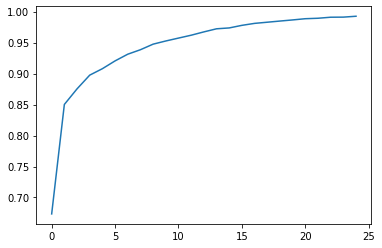

In [81]:
import matplotlib.pyplot as plt
plt.plot( model_1.history["accuracy"], label=["accuracy"])

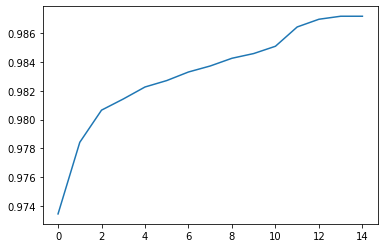

In [44]:
import matplotlib.pyplot as plt
plt.plot( model_1.history["accuracy"], label=["accuracy"])

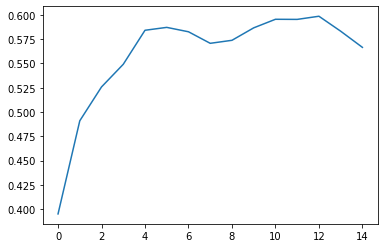

In [35]:
import matplotlib.pyplot as plt
plt.plot( model_1.history["accuracy"], label=["accuracy"])

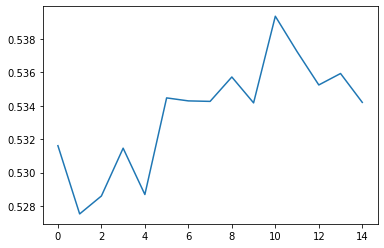

In [31]:
import matplotlib.pyplot as plt
plt.plot(model_1.history["accuracy"], label=["accuracy"])

In [82]:
model.save("digit_recognizer.h5")

In [83]:
new_model = tf.keras.models.load_model("digit_recognizer.h5")
print(new_model.layers)
new_model.evaluate(X_test, y_test)

[<tensorflow.python.keras.layers.core.Dense object at 0x00000198D76B0748>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198D76B0BA8>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198D76B0EB8>]
8400/8400 [==============================] - 0s 54us/sample - loss: 0.5931 - accuracy: 0.9233


[0.5930604325069136, 0.92333335]

# Create and use validation set

In [84]:
test_X, val_X, test_y, val_y = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

In [85]:
model_2 = model.fit(X_train, y_train, validation_data = (val_X, val_y),  epochs=25, batch_size=1024)

Train on 33600 samples, validate on 4200 samples
Epoch 1/25
33600/33600 [==============================] - 1s 27us/sample - loss: 0.0261 - accuracy: 0.9940 - val_loss: 0.6253 - val_accuracy: 0.9231
Epoch 2/25
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.6310 - val_accuracy: 0.9231
Epoch 3/25
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0211 - accuracy: 0.9950 - val_loss: 0.6254 - val_accuracy: 0.9229
Epoch 4/25
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0195 - accuracy: 0.9956 - val_loss: 0.6246 - val_accuracy: 0.9243
Epoch 5/25
33600/33600 [==============================] - 1s 27us/sample - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.6291 - val_accuracy: 0.9221
Epoch 6/25
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0170 - accuracy: 0.9961 - val_loss: 0.6329 - val_accuracy: 0.9231
Epoch 7/25
33600/33600 [==============================] -

In [86]:
model_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

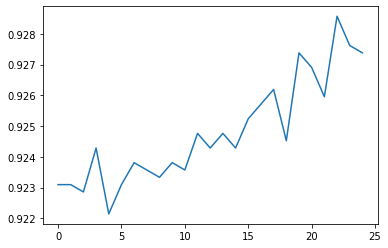

In [87]:
#plt.plot(model_2.history["accuracy"], label=["accuracy"])
plt.plot(model_2.history["val_accuracy"], label=["val_accuracy"])


In [88]:
model.save("digit_recognizer_2.h5")
new_model = tf.keras.models.load_model("digit_recognizer_2.h5")
print(new_model.layers)
new_model.evaluate(X_test, y_test)

[<tensorflow.python.keras.layers.core.Dense object at 0x00000198D6FEF668>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198D4AE6128>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198D6FDE2E8>]
8400/8400 [==============================] - 0s 57us/sample - loss: 0.6095 - accuracy: 0.9285


[0.6095491450760406, 0.9284524]

Train on 33600 samples, validate on 4200 samples
Epoch 1/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.6446 - val_accuracy: 0.9283
Epoch 2/150
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.6453 - val_accuracy: 0.9279
Epoch 3/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.6491 - val_accuracy: 0.9300
Epoch 4/150
33600/33600 [==============================] - 1s 28us/sample - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.6441 - val_accuracy: 0.9286
Epoch 5/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.6447 - val_accuracy: 0.9286
Epoch 6/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.6503 - val_accuracy: 0.9283
Epoch 7/150
33600/33600 [==========================

Epoch 54/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.6983 - val_accuracy: 0.9333
Epoch 55/150
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.7046 - val_accuracy: 0.9324
Epoch 56/150
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.7008 - val_accuracy: 0.9326
Epoch 57/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.7042 - val_accuracy: 0.9340
Epoch 58/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.7026 - val_accuracy: 0.9343
Epoch 59/150
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.7000 - val_accuracy: 0.9343
Epoch 60/150
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0065 - ac

33600/33600 [==============================] - 1s 29us/sample - loss: 3.6393e-04 - accuracy: 1.0000 - val_loss: 0.5445 - val_accuracy: 0.9538
Epoch 108/150
33600/33600 [==============================] - 1s 25us/sample - loss: 3.5642e-04 - accuracy: 1.0000 - val_loss: 0.5443 - val_accuracy: 0.9536
Epoch 109/150
33600/33600 [==============================] - 1s 25us/sample - loss: 3.5636e-04 - accuracy: 1.0000 - val_loss: 0.5460 - val_accuracy: 0.9533
Epoch 110/150
33600/33600 [==============================] - 1s 30us/sample - loss: 3.4481e-04 - accuracy: 1.0000 - val_loss: 0.5521 - val_accuracy: 0.9538
Epoch 111/150
33600/33600 [==============================] - 1s 25us/sample - loss: 3.5026e-04 - accuracy: 1.0000 - val_loss: 0.5437 - val_accuracy: 0.9536
Epoch 112/150
33600/33600 [==============================] - 1s 25us/sample - loss: 3.5654e-04 - accuracy: 1.0000 - val_loss: 0.5486 - val_accuracy: 0.9533
Epoch 113/150
33600/33600 [==============================] - 1s 25us/sample - 

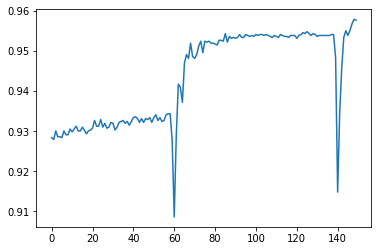

In [89]:
model_3 = model.fit(X_train, y_train, validation_data = (val_X, val_y),  epochs=150, batch_size=1024)
plt.plot(model_3.history["val_accuracy"], label=["val_accuracy"])

In [90]:
model.save("digit_recognizer_3.h5")
new_model = tf.keras.models.load_model("digit_recognizer_3.h5")
print(new_model.layers)
new_model.evaluate(X_test, y_test)

[<tensorflow.python.keras.layers.core.Dense object at 0x00000198D6CCBE80>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198D6CCBE10>, <tensorflow.python.keras.layers.core.Dense object at 0x00000198D6CCB9B0>]
8400/8400 [==============================] - 0s 55us/sample - loss: 0.3591 - accuracy: 0.9590


[0.3590880191735847, 0.9590476]

In [91]:
model.evaluate(X_test, y_test)

8400/8400 [==============================] - 0s 52us/sample - loss: 0.3591 - accuracy: 0.9590


[0.3590880191735847, 0.9590476]

# Sumbission TIme

In [113]:
sub = pd.read_csv("data/test.csv")

In [114]:
sub.shape

(28000, 784)

In [115]:
output = model.predict(sub)

In [118]:
outter = [out.argmax() for out in output]
outter

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 8,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 3,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 5,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 3,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 4,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 0,


In [123]:
out_df = pd.DataFrame(outter)
out_df = out_df.reset_index(drop=False)
out_df.columns = ["ImageId","Label"]
out_df["ImageId"] = out_df["ImageId"] + 1
out_df.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [124]:
out_df.to_csv("my_submission.csv", index=None)